In [33]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pycountry
import pycountry_convert as pc
%matplotlib inline

In [22]:
df_globe = pd.read_csv('./data/time_series_covid19_confirmed_global.csv.txt')


In [23]:
df_us = pd.read_csv('./data/time_series_covid19_confirmed_US.csv.txt')

In [40]:
def country_converter(country_name):
    try:
        cntry_cd = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent = pc.country_alpha2_to_continent_code(cntry_cd)
    except:
        continent = 'Error'
    return continent
        
    

In [41]:
df_globe['continent'] = df_globe['Country/Region'].apply(lambda x: country_converter(x))

In [47]:
df_EU = df_globe[df_globe.continent =='EU'].copy()

In [92]:
cols = [col for col in df_EU.columns if col.endswith('20')]

In [93]:
cols_eu = ['Country/Region'] + cols

In [73]:
df_EU_cntry = df_EU[cols].set_index('Country/Region').copy()

In [80]:
df_EU['Country/Region'].unique()

array(['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova',
       'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Ukraine', 'United Kingdom'], dtype=object)

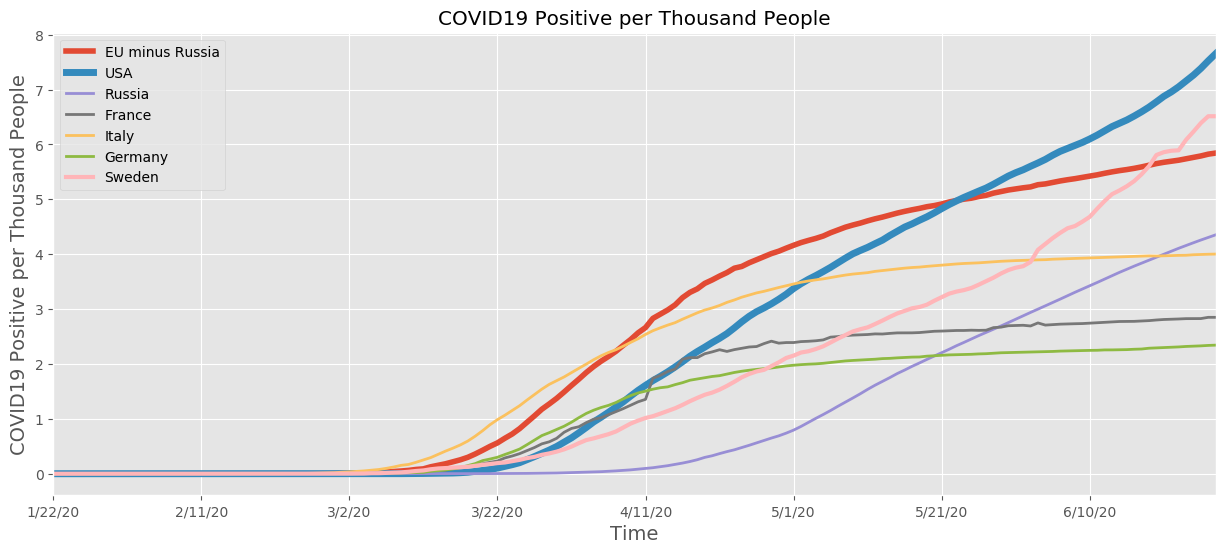

In [191]:
plt.figure(figsize=(15,6))
plt.style.use('ggplot')

df_EU_cntry[df_EU_cntry.index != 'Russia'].T.sum(axis=1).div(302e3).plot(label='EU minus Russia',lw=4)
df_us[cols].sum().div(328e3).plot(label='USA',lw=5)
df_EU_cntry[df_EU_cntry.index == 'Russia'].T.sum(axis=1).div(144e3).plot(label = 'Russia',lw=2)
df_EU_cntry[df_EU_cntry.index == 'France'].T.sum(axis=1).div(70e3).plot(label = 'France',lw=2)
df_EU_cntry[df_EU_cntry.index == 'Italy'].T.sum(axis=1).div(60e3).plot(label = 'Italy',lw=2)
df_EU_cntry[df_EU_cntry.index == 'Germany'].T.sum(axis=1).div(83e3).plot(label = 'Germany',lw=2)
df_EU_cntry[df_EU_cntry.index == 'Sweden'].T.sum(axis=1).div(10e3).plot(label = 'Sweden',lw=3)


plt.legend()
plt.title('COVID19 Positive per Thousand People')
plt.xlabel('Time',fontsize=14)
plt.ylabel('COVID19 Positive per Thousand People',fontsize=14)
plt.savefig('./covid19.png')

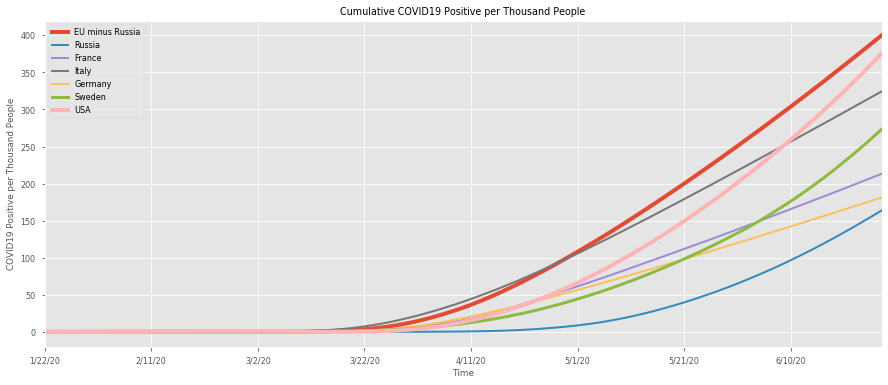

In [166]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-paper')

df_EU_cntry[df_EU_cntry.index != 'Russia'].T.sum(axis=1).div(302e3).cumsum().plot(label='EU minus Russia',lw=4)
df_EU_cntry[df_EU_cntry.index == 'Russia'].T.sum(axis=1).div(144e3).cumsum().plot(label = 'Russia',lw=2)
df_EU_cntry[df_EU_cntry.index == 'France'].T.sum(axis=1).div(70e3).cumsum().plot(label = 'France',lw=2)
df_EU_cntry[df_EU_cntry.index == 'Italy'].T.sum(axis=1).div(60e3).cumsum().plot(label = 'Italy',lw=2)
df_EU_cntry[df_EU_cntry.index == 'Germany'].T.sum(axis=1).div(83e3).cumsum().plot(label = 'Germany',lw=2)
df_EU_cntry[df_EU_cntry.index == 'Sweden'].T.sum(axis=1).div(10e3).cumsum().plot(label = 'Sweden',lw=3)
df_us[cols].sum().div(328e3).cumsum().plot(label='USA',lw=4)
plt.legend()
plt.title('Cumulative COVID19 Positive per Thousand People')
plt.xlabel('Time')
plt.ylabel('COVID19 Positive per Thousand People')
plt.savefig('./covid19_cum.png')

Text(0, 0.5, 'EU - Russia')

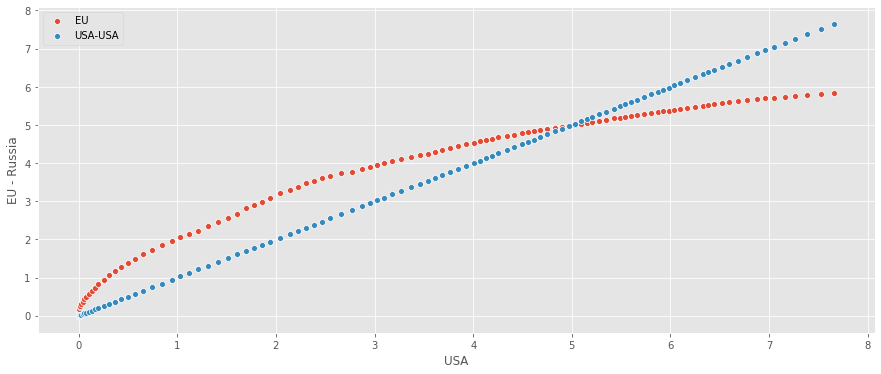

In [159]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = df_us[cols].sum().div(328e3).values,
               y = df_EU_cntry[df_EU_cntry.index != 'Russia'].T.sum(axis=1).div(302e3).values,label='EU')
sns.scatterplot(x = df_us[cols].sum().div(328e3).values,y = df_us[cols].sum().div(328e3).values,label='USA-USA')
plt.xlabel('USA')
plt.ylabel('EU - Russia')

In [183]:
df_us[cols].sum()

1/22/20          1
1/23/20          1
1/24/20          2
1/25/20          2
1/26/20          5
1/27/20          5
1/28/20          5
1/29/20          5
1/30/20          5
1/31/20          7
2/1/20           8
2/2/20           8
2/3/20          11
2/4/20          11
2/5/20          11
2/6/20          11
2/7/20          11
2/8/20          11
2/9/20          11
2/10/20         11
2/11/20         12
2/12/20         12
2/13/20         13
2/14/20         13
2/15/20         13
2/16/20         13
2/17/20         13
2/18/20         13
2/19/20         13
2/20/20         13
            ...   
5/29/20    1754747
5/30/20    1778993
5/31/20    1799122
6/1/20     1816476
6/2/20     1837367
6/3/20     1857248
6/4/20     1878543
6/5/20     1903854
6/6/20     1926538
6/7/20     1944309
6/8/20     1961781
6/9/20     1979868
6/10/20    2000702
6/11/20    2023590
6/12/20    2048986
6/13/20    2074526
6/14/20    2094317
6/15/20    2114026
6/16/20    2137731
6/17/20    2163290
6/18/20    2191052
6/19/20    2